In [1]:
## Bring in needed Mods
import pandas as pd, numpy as np, glob

## Load in matplotlib 
from matplotlib import pyplot as plt

## Load library of costom ftns
import transposonmobility as tmi

In [2]:
## Load in a chromosome map
Chrommap = tmi.loadmap()

## View head
Chrommap.head()

,T_name,T_size,Chrom,Cumpos,Midpts
0,XL280_Chr01,2309367,Chr01,0.0,1154683.5
1,XL280_Chr02,1649372,Chr02,2309367.0,3134053.0
2,XL280_Chr03,2117115,Chr03,3958739.0,5017296.5
3,XL280_Chr04,1793304,Chr04,6075854.0,6972506.0
4,XL280_Chr05,1473595,Chr05,7869158.0,8605955.5


In [3]:
## Set the color map to be used
qtlcolormap = tmi.colormap

## Gather sample info
sampleinfo = tmi.sampleinfo

## View head
sampleinfo.head()

,Sample,Passaged,Isolate,Name
0,23,0,4,XL280.3
1,21,0,1,XL280.1
2,1,30,1,30-01
3,2,30,1,Duplicate-30-01
4,3,30,1,30-02


In [4]:
## Load in centromeres
centromeres = tmi.loadcents()

## View centromere
centromeres.head()

,Sequence Name,Name,Minimum,Maximum,Length,Contig
0,XL280_Chr01,CEN1,932060,992559,60500,Chr01
1,XL280_Chr02,CEN2,870793,920730,49938,Chr02
2,XL280_Chr03,CEN3,810992,909244,98253,Chr03
3,XL280_Chr04,CEN4,216606,283957,67352,Chr04
4,XL280_Chr05,CEN5,774946,853557,78612,Chr05


In [5]:
## Load in gff
gff = tmi.loadgff()

## view tail
gff.tail()

,chrom,source,type,score,strand,phase,attribute,ID,Zstart,Zend
118822,Chr14,114,five_prime_UTR,0.621846,-,.,ID=utr_CNH03020-t26_1_3;Parent=CNH03020-t26_1,CNH03020,782218,782333
118823,Chr14,114,exon,0.621846,-,.,ID=exon_CNH03020-E2;Parent=CNH03020-t26_1,CNH03020,782386,782471
118824,Chr14,114,five_prime_UTR,0.621846,-,.,ID=utr_CNH03020-t26_1_4;Parent=CNH03020-t26_1,CNH03020,782386,782471
118825,Chr14,114,exon,0.621846,-,.,ID=exon_CNH03020-E1;Parent=CNH03020-t26_1,CNH03020,782528,782701
118826,Chr14,114,five_prime_UTR,0.621846,-,.,ID=utr_CNH03020-t26_1_5;Parent=CNH03020-t26_1,CNH03020,782528,782701


In [6]:
## Set the name of the TE to be analyzed
TE_name = 'T1'

## Set the path to the blat resutls 
temp_path = '../blat/%s/BLAT_%s*.csv.gz'%(TE_name,TE_name)

## Load in TE hits using our ftns
TE_hits = tmi.loadhits(temp_path)

We have detected data for 23 samples


In [7]:
TE_hits.head()

,match,mismatch,rep_match,Ns,Q_gap_count,Q_gap_bases,T_gap_count,T_gap_bases,T_strand,Q_name,...,tStarts,Q_frac,TE_T_start,TE_T_end,TE_T_name,TE_Q_frac,Read,Sample,Lane,Chrom
0,76,0,0,0,0,0,0,0,+,493774,...,"31130,",1.0,9,85,T1,1.000000,1,10,1,Chr06
1,76,0,0,0,0,0,0,0,+,1305858,...,"832649,",1.0,600,676,T1,0.934211,1,10,1,Chr06
2,76,0,0,0,0,0,0,0,+,623559,...,"30958,",1.0,379,455,T1,0.947368,1,10,1,Chr06
3,76,0,0,0,0,0,0,0,-,1646806,...,"33927,",1.0,290,366,T1,0.973684,1,10,1,Chr06
4,76,0,0,0,0,0,0,0,-,639843,...,"33917,",1.0,500,575,T1,0.934211,2,10,1,Chr06


In [8]:
## Set y and other lables
my_ylabel = '# of Paired reads\nbetween\n%s and chromosome'%TE_name

## Set the labels used by Asiay for XL280, non-passaged strains
asiya_labels = ['XL280.%s'%(i) for i in np.arange(1,4)]

## Make a figure layout index
figmap = [2] + list(np.arange(5,15))

In [9]:
## via chromosome windows count the number of anchor reads
tedfall = tmi.tedfall(hits=TE_hits)

## How large is this dataframe
tedfall.shape

(44643, 7)

In [10]:
## View head
tedfall.head()

,Pos,Reads,Chrom,Sample,Passaged,Isolate,Name
0,5000,0,Chr01,23,0,4,XL280.3
1,15000,0,Chr01,23,0,4,XL280.3
2,25000,0,Chr01,23,0,4,XL280.3
3,35000,0,Chr01,23,0,4,XL280.3
4,45000,0,Chr01,23,0,4,XL280.3


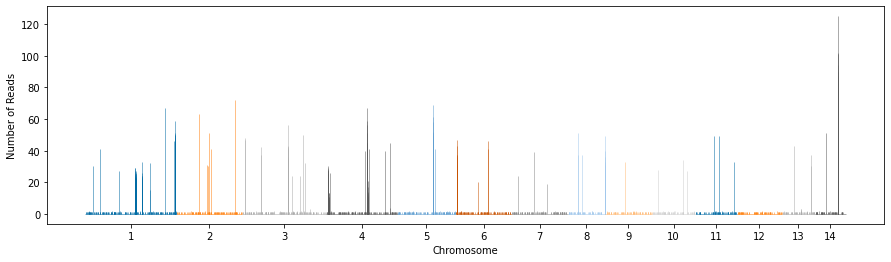

In [14]:
## Test our manhattan plot
tmi.manhattan_plot(tedfall,figsize=(15,4))

In [30]:
iso1 = sampleinfo[(sampleinfo.Isolate==1)].reset_index(drop=True)
iso1

,Sample,Passaged,Isolate,Name
0,21,0,1,XL280.1
1,1,30,1,30-01
2,2,30,1,Duplicate-30-01
3,3,30,1,30-02
4,4,30,1,30-16
5,5,30,1,Duplicate-30-16
6,11,37,1,37-01
7,12,37,1,37-02
8,13,37,1,37-16
9,14,37,1,37-17


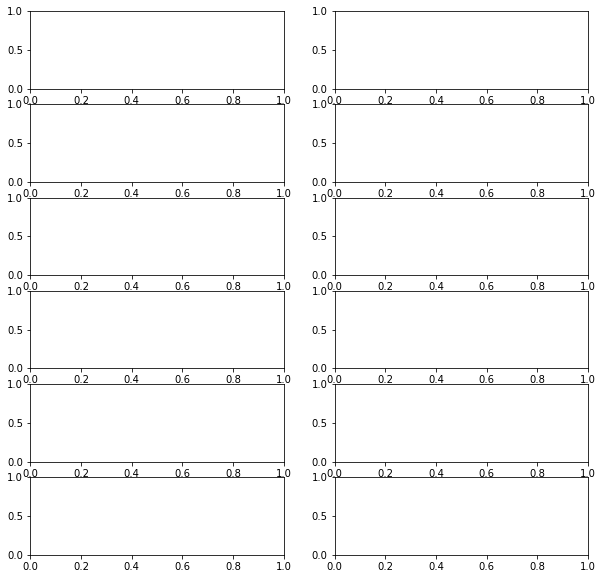

In [28]:
fig,ax = plt.subplots(6,2,figsize=(10,10),sharey=True,sharex=True)

for j,k in 
for i,r in iso1.iterrows():
    
    
    
    plt.sca()

In [25]:
tedfall[(tedfall.Name.isin(iso1.Name.tolist()))]

,Pos,Reads,Chrom,Sample,Passaged,Isolate,Name
0,5000,0,Chr01,21,0,1,XL280.1
1,15000,1,Chr01,21,0,1,XL280.1
2,25000,0,Chr01,21,0,1,XL280.1
3,35000,0,Chr01,21,0,1,XL280.1
4,45000,0,Chr01,21,0,1,XL280.1
...,...,...,...,...,...,...,...
75,755000,0,Chr14,15,37,1,37-03
76,765000,0,Chr14,15,37,1,37-03
77,775000,0,Chr14,15,37,1,37-03
78,785000,0,Chr14,15,37,1,37-03


,Sample,Passaged,Isolate,Name
1,21,0,1,XL280.1
2,1,30,1,30-01
3,2,30,1,Duplicate-30-01
4,3,30,1,30-02
5,4,30,1,30-16
6,5,30,1,Duplicate-30-16
13,11,37,1,37-01
14,12,37,1,37-02
15,13,37,1,37-16
16,14,37,1,37-17


In [12]:
unpass_samples = sorted(tedfall[(tedfall.Passaged==0)].Sample.unique())

In [13]:
np_sumr = [tedfall[(tedfall.Sample.isin(unpass_samples)) & (tedfall.Cumpos==c)].Reads.sum() for c in sorted(tedfall.Cumpos.unique())[:]]

AttributeError: 'DataFrame' object has no attribute 'Cumpos'

In [ ]:
npdf = tedfall[['Cumpos','Contig']].drop_duplicates().copy().sort_values('Cumpos')
npdf['Reads'] = np_sumr
npdf.head()

In [ ]:
ylim = 60

In [ ]:
fig,ax = plt.subplots(1,1,figsize=(15,3))

#plt.hlines(10,-1000,19.2*(10**6),linestyle='--',alpha=0.5,linewidth=1)

for i,cont in enumerate(contigs):
    
    shc = npdf[(npdf.Contig==cont)]
    clen = Chrommap[(Chrommap.Chrom==cont)]['T_size'].min()
    
    plt.plot(shc.Cumpos,shc.Reads)
    
plt.title('Sum of paired-reads in non-passaged XL280 strains',fontsize=14);
plt.xticks(Chrommap.Midpts,Chrommap.index.values+1,fontsize=14);
plt.ylim(-1,ylim);
plt.xlabel('Chromosome',fontsize=14)
plt.ylabel('Total '+my_ylabel,fontsize=14);
##plt.savefig('./FIGURES/%s/%s_Non-passaged_Summed_BLAT_ALN.pdf'%(
#    TE_name,TE_name), dpi=300,bbox_inches='tight')

In [ ]:
native_hits = npdf[(npdf.Reads>5)].copy()

In [ ]:
native_hits['Combine'] = [0,1,0,1,1] + [0,1] + [0,1,0,1] + [1,1,1,1]
native_hits['Wmod'] = [0,4,0,3,3] + [0,2] + [0,2,0,2] + [1,1,1,1]
native_hits

In [ ]:
fig,ax = plt.subplots(3,1,figsize=(12,8),sharey=True)
for k,j in enumerate([21,22,23]):
    
    plt.sca(ax.ravel()[k])
    plt.hlines(10,-1000,19.2*(10**6),linestyle='--',
               alpha=0.5,linewidth=1,color='k')

    for i,cont in enumerate(contigs):
    
        colour = chrom_colors[i%len(chrom_colors)]
    
        xc = tedfall[(tedfall.Sample==j) & (tedfall.Contig==cont)]
        plt.plot(xc.Cumpos.values,
                 xc.Reads.values,
                 alpha=0.75,
                 color='lightgrey' if i%2==0 else 'k')#color=colour)

    #ispass = 'Non-passaged'
    #iso = tedfall[(tedfall.Sample==j)].Isolate.min()
    #plt.title('Isolate %s\nSample %s\n%s'%(iso,j,ispass),
    #              y=0.7,x=1.01,va='center',ha='left')
    name = sampleinfo[(sampleinfo.Sample==j)].Name.min()
    plt.title(name,y=0.8,fontsize=12)
    
    plt.ylim(-1,ylim)
    plt.xticks(Chrommap.Midpts,Chrommap.index.values+1);
fig.text(0.5,.9,'Non-passaged XL280 strains',va='center',ha='center',fontsize=14);
fig.text(0.09,0.5,'# of paired reads between %s and chromosome'%TE_name,
         rotation=90,fontsize=14,va='center',ha='center');
plt.xlabel('Chromosome',fontsize=14);
##plt.savefig('./FIGURES/%s/%s_Non-passaged_BLAT_ALN.pdf'%(
#    TE_name,TE_name), dpi=300,bbox_inches='tight')

In [ ]:
fig,ax = plt.subplots(native_hits[(native_hits.Combine==1)].shape[0],len(unpass_samples),
                      figsize=(8,35),sharey='row',sharex='row')

for ri,(j,temp) in enumerate(native_hits[(native_hits.Combine==1)].iterrows()):
    chrom = temp.Contig
    clen = Chrommap[(Chrommap.Chrom==chrom)]['T_size'].min()
    cumpos = temp.Cumpos.min()
    wm = temp.Wmod
    for ci,si in enumerate(unpass_samples):
        
        plt.sca(ax[ri,ci])
        
        nj = tedfall[(tedfall.Cumpos==cumpos) & 
                (tedfall.Contig==chrom) & 
                (tedfall.Sample==21)]
        
        x1 = nj.Pos.min()-wm*wsize
        x2 = nj.Pos.min()+wm*wsize
        plot_hit(TE_hits,si,x1,x2,chrom,clen,gff,ax[ri,ci],fs=6)     
        
        locs,labs = plt.xticks()
        plt.xticks(locs,locs/wsize)
        
        if ci == 0:
            plt.title('Chromosome %s          %s'%(int(chrom[3:]),asiya_labels[ci]),x=0)
            plt.ylabel('%s Position'%TE_name)
        else:
            plt.title('%s'%asiya_labels[ci]);
plt.sca(ax[-1,1]);plt.xlabel('Chromosome Coordinate (10 kb)');        
plt.subplots_adjust(hspace=0.5)
##plt.savefig('./FIGURES/%s/%s_Native_Hits_Non-passaged_BLAT_ALN.pdf'%(
#    TE_name,TE_name), dpi=300,bbox_inches='tight')

In [ ]:
fig,ax = plt.subplots(6,1,figsize=(15,15),sharey=True)
iso = 1
t = 30
for k,j in sampleinfo[(sampleinfo.Isolate==iso) & 
           (sampleinfo.Passaged.isin([0,t]))
                     ].reset_index(drop=True).iterrows():
    
    plt.sca(ax.ravel()[k])
    plt.hlines(10,-1000,19.2*(10**6),linestyle='--',
               alpha=0.5,linewidth=1,color='k')

    for i,cont in enumerate(contigs):
        
        colour = chrom_colors[i%len(chrom_colors)]
    
        xc = tedfall[(tedfall.Sample==j.Sample) & 
                     (tedfall.Contig==cont)]
        plt.plot(xc.Cumpos.values,
                 xc.Reads.values,
                 alpha=0.75,color=colour)
    
        if j.Passaged!=0:
            ispass = u'Passaged: %s \u00B0C'%j.Passaged
        else:
            ispass = 'Non-passaged'
        
        name = sampleinfo[(sampleinfo.Sample==j.Sample)].Name.min()
        
        plt.title('Isolate: %s\nSample: %s\n%s'%(iso,name,ispass),
                  y=0.7,x=1.01,va='center',ha='left')
    
    plt.ylim(-1,ylim)
    plt.xticks(Chrommap.Midpts,Chrommap.index.values+1);
fig.text(0.09,0.5,'# of paired reads between %s and chromosome'%TE_name,
         rotation=90,fontsize=14,va='center',ha='center');
plt.xlabel('Chromosome',fontsize=14);
##plt.savefig('./FIGURES/%s/%s_Iso%s_Passaged_%sC_BLAT_ALN.pdf'%(
#    TE_name,TE_name,iso,t),dpi=300,bbox_inches='tight');

In [ ]:
iso1_30 = tedfall[(tedfall.Isolate==1) & (tedfall.Passaged==30)].Sample.unique()
s21_30 = tedfall[(tedfall.Sample==21) & (tedfall.Reads>9)]
temp_res = tedfall[(tedfall.Sample.isin(iso1_30)) & 
                   (tedfall.Reads>9) & 
                   ~(tedfall.Cumpos.isin(native_hits.Cumpos))]
pos_counts = np.unique(temp_res.Cumpos.values,return_counts=True)
common = pos_counts[0][pos_counts[1] == len(iso1_30)]
k = temp_res[~(temp_res.Cumpos.isin(common))].sort_values(['Sample','Passaged','Contig','Pos'])
k.shape

In [ ]:
fig,ax = plt.subplots(2,5,figsize=(15,5),sharey=True,dpi=300)

for ji,(j,cn) in enumerate(k.iterrows()):
    si = cn.Sample
    chrom = cn.Contig
    clen = Chrommap[(Chrommap.Chrom==chrom)]['T_size'].min()
    wm = 1
    x1 = cn.Pos - wm*wsize
    x2 = cn.Pos + wm*wsize
    ## Find the TE
    #vte = vikas_te[(vikas_te.Contig==chrom) & 
    #               (vikas_te.Minimum>=x1) & 
    #               (vikas_te.Maximum<=x2)]
    
    #cent = centromeres[(centromeres.Contig==chrom) & 
    #                   (centromeres.Minimum>=x1) & 
    #                   (centromeres.Maximum<=x2)]
    plt.sca(ax.ravel()[ji])
    plot_hit(TE_hits,si,x1,x2,chrom,clen,gff,ax.ravel()[ji],fs=6)
        
    locs,labs = plt.xticks()
    plt.xticks(locs[::2],locs[::2]/wsize)
    
    name = sampleinfo[(sampleinfo.Sample==si)].Name.min()
    plt.title('%s\nChromosome %s'%(name,int(chrom[3:])),fontsize=12)
        
plt.subplots_adjust(hspace=0.5,wspace=0.3)

fig.text(0.07,0.5,'%s Position'%TE_name,
         va='center',ha='center',rotation=90,fontsize=14)

fig.text(0.5,0.03,'Chromosome Coordinates (10 kb)',
         fontsize=14,va='center',ha='center')
#plt.savefig('./FIGURES/%s/%s_Novel_Hits_Iso%s_Passaged_%sC_BLAT_ALN.pdf'%(
#    TE_name,TE_name,iso,t),dpi=300,bbox_inches='tight');

In [ ]:
vikas_te[(vikas_te.Contig.isin(k.Contig.unique()))]

In [ ]:
fig,ax = plt.subplots(6,1,figsize=(15,15),sharey=True)
iso = 2
t = 30
for k,j in sampleinfo[(sampleinfo.Isolate==iso) & 
           (sampleinfo.Passaged.isin([0,t]))
                     ].reset_index(drop=True).iterrows():
    
    plt.sca(ax.ravel()[k])
    plt.hlines(10,-1000,19.2*(10**6),linestyle='--',
               alpha=0.5,linewidth=1)

    for i,cont in enumerate(contigs):
        
        colour = chrom_colors[i%len(chrom_colors)]
    
        xc = tedfall[(tedfall.Sample==j.Sample) & 
                     (tedfall.Contig==cont)]
        plt.plot(xc.Cumpos.values,
                 xc.Reads.values,
                 alpha=0.75,color=colour)

        if j.Passaged!=0:
            ispass = u'Passaged: %s \u00B0C'%j.Passaged
        else:
            ispass = 'Non-passaged'
        
        name = sampleinfo[(sampleinfo.Sample==j.Sample)].Name.min()
        
        plt.title('Isolate: %s\nSample: %s\n%s'%(iso,name,ispass),
                  y=0.7,x=1.01,va='center',ha='left')
    
    plt.ylim(-1,ylim)
    plt.xticks(Chrommap.Midpts,Chrommap.index.values+1);
    
fig.text(0.09,0.5,'# of paired reads between %s and chromosome'%TE_name,
         rotation=90,fontsize=14,va='center',ha='center');
plt.xlabel('Chromosome',fontsize=14);

#plt.savefig('./FIGURES/%s/%s_Iso%s_Passaged_%sC_BLAT_ALN.pdf'%(
#    TE_name,TE_name,iso,t),dpi=300,bbox_inches='tight');
   

In [ ]:
iso2_30 = tedfall[(tedfall.Isolate==2) & (tedfall.Passaged==30)].Sample.unique()
s22_30 = tedfall[(tedfall.Sample==22) & (tedfall.Reads>9)]

temp_res = tedfall[(tedfall.Sample.isin(iso2_30)) & 
                   (tedfall.Reads>9) & 
                   ~(tedfall.Cumpos.isin(native_hits.Cumpos))]

pos_counts = np.unique(temp_res.Cumpos.values,return_counts=True)
common = pos_counts[0][pos_counts[1] == len(iso2_30)]
k = temp_res[~(temp_res.Cumpos.isin(common))].sort_values(['Sample','Passaged','Contig','Pos'])
k.shape

In [ ]:
fig,ax = plt.subplots(1,3,figsize=(10,2),sharey=True,dpi=300)

for ji,(j,cn) in enumerate(k.iterrows()):
    si = cn.Sample
    chrom = cn.Contig
    clen = Chrommap[(Chrommap.Chrom==chrom)]['T_size'].min()
    wm = 1
    x1 = cn.Pos - wm*wsize
    x2 = cn.Pos + wm*wsize
    ## Find the TE
    vte = vikas_te[(vikas_te.Contig==chrom) & 
                   (vikas_te.Minimum>=x1) & 
                   (vikas_te.Maximum<=x2)]
    
    cent = centromeres[(centromeres.Contig==chrom) & 
                       (centromeres.Minimum>=x1) & 
                       (centromeres.Maximum<=x2)]
    plt.sca(ax.ravel()[ji])
    plot_hit(TE_hits,si,x1,x2,chrom,clen,gff,ax.ravel()[ji],fs=6)
        
    #plt.hlines(0,vte.Minimum.values,vte.Maximum.values,
    #               color='k',linewidth=2,linestyle='--')

    locs,labs = plt.xticks()
    plt.xticks(locs[::2],locs[::2]/wsize)
    
    name = sampleinfo[(sampleinfo.Sample==si)].Name.min()
    plt.title('%s\nChromosome %s'%(name,int(chrom[3:])),fontsize=12)
        
plt.subplots_adjust(hspace=.5)
fig.text(0.5,-0.07,s='Chromosome Coordinates (10 kb)',
         fontsize=14,va='center',ha='center')
plt.sca(ax[0]);plt.ylabel('%s Position'%TE_name,fontsize=14)
#plt.savefig('./FIGURES/%s/%s_Novel_Hits_Iso%s_Passaged_%sC_BLAT_ALN.pdf'%(
#    TE_name,TE_name,iso,t),dpi=300,bbox_inches='tight');

In [ ]:
vikas_te[(vikas_te.Contig.isin(k.Contig))]

In [ ]:
sampleinfo[(sampleinfo.Sample==21)]

In [ ]:
forfig2B = sampleinfo[(sampleinfo.Passaged==37) & 
                       (sampleinfo.Isolate==1) & 
                       (sampleinfo.Sample.isin([11,12,15])) |
                       (sampleinfo.Sample==21)].reset_index(drop=True)

forfig2B.head()

In [ ]:
iso1_37 = tedfall[(tedfall.Isolate==1) & (tedfall.Passaged==37)].Sample.unique()
s21_37 = tedfall[(tedfall.Sample==21) & (tedfall.Reads>9)]

temp_res = tedfall[(tedfall.Sample.isin(iso1_37)) & 
                   (tedfall.Reads>9) & 
                   ~(tedfall.Cumpos.isin(native_hits.Cumpos))]

pos_counts = np.unique(temp_res.Cumpos.values,return_counts=True)
common = pos_counts[0][pos_counts[1] == len(iso1_37)]

results = temp_res[~(temp_res.Cumpos.isin(common))].sort_values(['Sample','Passaged','Contig','Pos'])
results.shape

In [ ]:
plt.style.use(['tableau-colorblind10'])

In [ ]:
results.head()

In [ ]:
fig,ax = plt.subplots(forfig2B.shape[0],1,figsize=(15,10),sharey=True);
fig.set_facecolor('w')

fs = 12
rms = 10
yt = 5#-80
for k,j in forfig2B.iterrows():
    
    plt.sca(ax[k])
    
    #plt.hlines(10,-1000,19.2*(10**6),linestyle='--',alpha=0.5,linewidth=1,color='k')
    s = j.Name.split('.')[0]
    print(s)
    temp = results[(results.Sample==j.Sample)]
    #plt.title(s,x=0.035,y=0.8,fontsize=fs)
    
    if k == 0:
        wti = j.Sample
    else:
        pass
    
    for i,cont in enumerate(contigs):
        
    
        xc = tedfall[(tedfall.Sample==j.Sample) & 
                     (tedfall.Contig==cont)]
        
        wtxc = tedfall[(tedfall.Sample==wti) & 
                     (tedfall.Contig==cont)]
        
        plt.plot(xc.Cumpos.values,xc.Reads.values,alpha=0.75)
        #plt.plot(xc.Cumpos.values, xc.Reads.values/(wtxc.Reads.values+1))
        
        tempch = temp[(temp.Contig==cont)]
        if tempch.shape[0] > 0:
            plt.plot(tempch.Cumpos,(0*tempch.Pos)-yt,
                     '^',ms=rms,
                     color='r',
                     #color='lightgreen',
                     #label='Novel T1 Insertion Site' if (k == 3) and (i == 1) else None,
                     label='                         ' if (k == 3) and (i == 1) else None)
            
        if (cont in ['Chr04','Chr05']) & (k == 3):
            gone = tedfall[(tedfall.Sample==21) & 
                           (tedfall.Contig==cont) & 
                           (tedfall.Reads>10)].Cumpos.min()
            plt.plot(gone,-yt,'k*',ms=rms+2,
            label='                         '  if (k == 3) and (i == 3) else None)
            #label='Loss of T1 Site' if (k == 3) and (i == 3) else None

    plt.xlim(-200000,19.3*10**6)
    plt.xticks(Chrommap.Midpts,Chrommap.index.values+1,fontsize=fs);
    plt.yticks(np.arange(0,140,20),fontsize=fs)
    plt.ylim(-15,130)
    [ax[k].spines[sp].set_visible(False) for sp in ['top','right']]

plt.sca(ax[0])
plt.plot(3.5*(10**6),123,'r^',ms=rms)  
plt.plot(3.5*(10**6),80,'k*',ms=rms+2)

#plt.legend(bbox_to_anchor=(.3,5.5),fontsize=12,frameon=False)
#plt.xlabel("Chromosome",fontsize=fs);
#fig.text(s='Number of Supporting Reads',fontsize=fs,
#         x=0.08,y=0.5,rotation=90,va='center',ha='center');
plt.subplots_adjust(hspace=0.32)
#plt.savefig('../FIGURES/Figure1_C_v1_nolabels.png',
#            dpi=400,bbox_inches='tight')

In [ ]:
forfig2B

In [ ]:
fig,ax = plt.subplots(forfig2B.shape[0],1,figsize=(15,10),sharey=True);
fig.set_facecolor('w')

for k,j in forfig2B.iterrows():
    
    plt.sca(ax[k])
    
    s = j.Name.split('.')[0]

    plt.title(s + '$\mathrm{\u03B1}$' +' non-passaged' if k == 0 else s,
              x=0.1 if (k == 0) else 0.05, y=0.8,fontsize=12)
    
    if k == 0:
        wti = j.Sample
    else:
        pass
    
    for i,cont in enumerate(contigs):
        
    
        xc = tedfall[(tedfall.Sample==j.Sample) & 
                     (tedfall.Contig==cont)]
        
        wtxc = tedfall[(tedfall.Sample==wti) & 
                     (tedfall.Contig==cont)]
        
        chromcolor = qtlcolormap[i%int(len(qtlcolormap))]
        
        plt.plot(xc.Cumpos.values, xc.Reads.values/(wtxc.Reads.values+1),
                 color=chromcolor)
        plt.plot(xc.Cumpos.values, -1*wtxc.Reads.values/(xc.Reads.values+1),
                 color=chromcolor)
    
    plt.xlim(-200000,19.3*10**6)
    plt.xticks(Chrommap.Midpts,Chrommap.index.values+1,fontsize=12)
    plt.yticks(fontsize=12)

    [ax[k].spines[sp].set_visible(False) for sp in ['top','right']]

fig.text(0.5,0.07,va='center',ha='center',
        fontsize=14,s='Chromosome')

fig.text(0.07,0.5,rotation=90,va='center',ha='center',fontsize=14,
         s='Number of Reads Supporting %s Insertion Relative to non-passaged'%TE_name)
plt.subplots_adjust(hspace=0.3)
plt.savefig('../FIGURES/Figure_2B.png',dpi=400,bbox_inches='tight')

In [ ]:
fig,ax = plt.subplots(forfig2B.shape[0],1,figsize=(15,10),sharey=True);
fig.set_facecolor('w')

for k,j in forfig2B.iterrows():
    
    plt.sca(ax[k])
    
    s = j.Name.split('.')[0]
    
    if k == 0:
        wti = j.Sample
    else:
        pass
    
    for i,cont in enumerate(contigs):
        
    
        xc = tedfall[(tedfall.Sample==j.Sample) & 
                     (tedfall.Contig==cont)]
        
        wtxc = tedfall[(tedfall.Sample==wti) & 
                     (tedfall.Contig==cont)]
        
        chromcolor = qtlcolormap[i%int(len(qtlcolormap))]
        
        plt.plot(xc.Cumpos.values, xc.Reads.values/(wtxc.Reads.values+1),
                 color=chromcolor)
        plt.plot(xc.Cumpos.values, -1*wtxc.Reads.values/(xc.Reads.values+1),
                 color=chromcolor)
    
    plt.xlim(-200000,19.3*10**6)
    plt.xticks(Chrommap.Midpts,Chrommap.index.values+1,fontsize=12)
    

    [ax[k].spines[sp].set_visible(False) for sp in ['top','right']]
    
    p,l = plt.xticks()
    plt.xticks(p,[' ' for x in p])

p,l = plt.yticks()
plt.yticks(p[1:],[' ' for x in p[1:]])

plt.subplots_adjust(hspace=0.3)
plt.savefig('../FIGURES/Figure_2B_nolabels.png',dpi=400,bbox_inches='tight')